<a href="https://colab.research.google.com/github/SOD-GIT/sod_resources/blob/main/cust_detect_sod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# CHANGE RUNTIME TO GPU FIRST

### Intialization

In [12]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 13472, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 13472 (delta 0), reused 1 (delta 0), pack-reused 13468
Receiving objects: 100% (13472/13472), 12.11 MiB | 24.85 MiB/s, done.
Resolving deltas: 100% (9399/9399), done.


In [13]:
!pip install -r yolov5/requirements.txt

     |████████████████████████████████| 596 kB 5.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [14]:
!git clone https://github.com/SOD-GIT/sod_resources.git

Cloning into 'sod_resources'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 20 (delta 5), reused 9 (delta 2), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [15]:
import gdown
url = "https://drive.google.com/uc?id=1g3uUsucjvJvE9g39Em8XhV2F2YtoXoc0"
gdown.download(url, "best.pt")

Downloading...
From: https://drive.google.com/uc?id=1g3uUsucjvJvE9g39Em8XhV2F2YtoXoc0
To: /content/best.pt
100%|██████████| 173M/173M [00:00<00:00, 173MB/s]


'best.pt'

In [16]:
def getSh(source):
    model_path = "/content/yolov5/detect.py"
    weights = "/content/best.pt"
    data_cfg = "/content/sod_resources/dataset.yaml"
    save_path = "/content/"
    test_cmd = "python {path} --source {src} --weights {wght} --data {cfg} --img {img_size} --conf=0.4 --project {sv_path} --name out"
    sh_cmd = test_cmd.format(src=source, path=model_path, wght=weights, cfg=data_cfg, img_size=256, sv_path=save_path)
    with open('run_script.sh', 'w') as file:
      file.write(sh_cmd)

### Detection

In [22]:
# provide path of image
image_path = "/content/test_img.png"
getSh(image_path)

In [24]:
# run this cell to get output
!bash run_script.sh

detect: weights=['/content/best.pt'], source=/content/test_img.png, data=/content/sod_resources/dataset.yaml, imgsz=[256, 256], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/, name=out, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-191-gd29df68 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 444 layers, 86233975 parameters, 0 gradients
image 1/1 /content/test_img.png: 256x256 1 Bridge, 3 Rivers, 1 Watercraft, Done. (0.263s)
Speed: 0.5ms pre-process, 263.4ms inference, 2.2ms NMS per image at shape (1, 3, 256, 256)
Results saved to /content/out


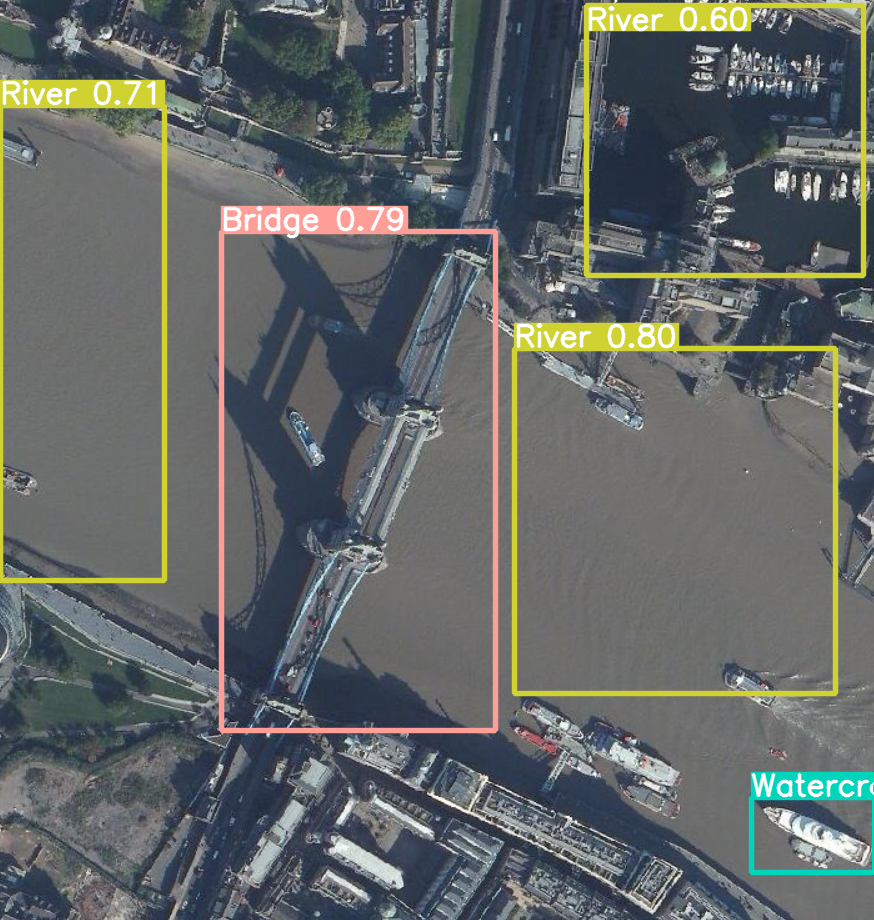

In [25]:
# show results
import cv2
from google.colab.patches import cv2_imshow
out_path = "/content/out/" + image_path.split('/')[-1]
img = cv2.imread(out_path)
cv2_imshow(img)